In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/PlayerTracking/tracker
!pip install -qr requirements.txt
%cd yolov5
!pip install -qr requirements.txt
%cd ..


/content/gdrive/MyDrive/PlayerTracking/tracker
     |████████████████████████████████| 6.0 MB 18.4 MB/s 
     |████████████████████████████████| 61 kB 527 kB/s 
     |████████████████████████████████| 190 kB 73.8 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 177 kB 72.1 MB/s 
     |████████████████████████████████| 182 kB 68.4 MB/s 
     |████████████████████████████████| 66 kB 5.9 MB/s 
     |████████████████████████████████| 61 kB 578 kB/s 
     |████████████████████████████████| 61 kB 623 kB/s 
     |████████████████████████████████| 61 kB 417 kB/s 
     |████████████████████████████████| 61 kB 369 kB/s 
     |████████████████████████████████| 64 kB 3.7 MB/s 
     |████████████████████████████████| 69 kB 9.0 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 64 kB 3.4 MB/s 
     |████████████████████████████████| 73 kB 2.3 MB/s 
     |████████████████████████████████| 41 kB 750

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from IPython.display import display, HTML

display(HTML('<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Source Serif Pro">'))

with open("/content/gdrive/MyDrive/PlayerTracking/style.css", "r") as file:
    display(HTML('<style>' + file.read() + '</style>'))

## Simple testing on videos found on the web + team classification.

In [ ]:
!python3 track_football.py --source ../data/t4.mp4 \
--referee-color red --team1-color white --team2-color blue --max-frames 15 \
--classes 0 32 --save-vid --save-txt --save-crop

Traceback (most recent call last):
  File "track_football.py", line 15, in <module>
    import torch
  File "/usr/local/lib/python3.7/dist-packages/torch/__init__.py", line 202, in <module>
    from torch._C import *  # noqa: F403
RuntimeError: KeyboardInterrupt: 


## Now let's try to track on videos from the Croatian league.

In [ ]:
%cd /content/gdrive/MyDrive/PlayerTracking/tracker/
!python3 track.py --source ../data/t4.mp4 --classes 0 32 --save-vid --imgsz 3264

/content/gdrive/MyDrive/PlayerTracking/tracker
File: /content/gdrive/MyDrive/PlayerTracking/tracker/yolov5/utils/general.py
ROOT: /content/gdrive/MyDrive/PlayerTracking/tracker/yolov5
File: /content/gdrive/MyDrive/PlayerTracking/tracker/yolov5/utils/general.py
ROOT: /content/gdrive/MyDrive/PlayerTracking/tracker/yolov5
track: yolo_weights=/content/gdrive/MyDrive/PlayerTracking/tracker/weights/yolov5m.pt, appearance_descriptor_weights=/content/gdrive/MyDrive/PlayerTracking/tracker/weights/osnet_x0_25_msmt17.pt, tracking_method=strongsort, source=../data/t4.mp4, imgsz=[3264, 3264], conf_thres=0.5, iou_thres=0.5, max_det=1000, device=, show_vid=False, save_txt=False, save_conf=False, save_crop=False, save_vid=True, nosave=False, classes=[0, 32], agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/track, name=exp, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=False, hide_class=False, half=False, dnn=False, eval=False
requirements: tb-nightly not 

## Unpack dataset from the Roboflow

In [ ]:
!curl -L "https://app.roboflow.com/ds/HPzMjNUV3p?key=pvix32go69" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   2024      0 --:--:-- --:--:-- --:--:--  2020
^C


Position to the object tracker

In [ ]:
%cd /content/gdrive/MyDrive/PlayerTracking/tracker/yolov5

/content/gdrive/MyDrive/PlayerTracking/tracker/yolov5


##  Let's try to check the performance of every yolov5 model and see which untrained model is the best


We will make use of the fastest model, yolov5s.

In [ ]:
!python3 val.py --weights yolov5s.pt --data ../data.yaml --single-cls

File: /content/gdrive/MyDrive/PlayerTracking/tracker/yolov5/utils/general.py
ROOT: /content/gdrive/MyDrive/PlayerTracking/tracker/yolov5
val: data=../data.yaml, weights=['yolov5s.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=True, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 2022-10-22 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
val: Scanning '/content/gdrive/MyDrive/PlayerTracking/tracker/yolov5/../valid/labels.cache' images and labels... 1068 found, 0 missing, 0 empty, 0 corrupt: 100% 1068/1068 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100% 34/34 [00:42<00:00,  1.25s/it]
                   all       1068      24564     0.0749     0.0802   

The first version doesn't work good at all and fails to detect almost any object. However, after specifying correct image size, things start to make sense...

In [ ]:
!python3 val.py --weights yolov5s.pt --data ../data.yaml --single-cls --img 3260

File: /content/gdrive/MyDrive/PlayerTracking/tracker/yolov5/utils/general.py
ROOT: /content/gdrive/MyDrive/PlayerTracking/tracker/yolov5
val: data=../data.yaml, weights=['yolov5s.pt'], batch_size=32, imgsz=3260, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=True, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 2022-10-22 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
val: Scanning '/content/gdrive/MyDrive/PlayerTracking/tracker/yolov5/../valid/labels.cache' images and labels... 1068 found, 0 missing, 0 empty, 0 corrupt: 100% 1068/1068 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100% 34/34 [01:19<00:00,  2.33s/it]
                   all       1068      24564      0.495      0.681   

After specifying correct image size, we got precision of 49.5% and recall of 68.1%. MAP value now makes sense and it is 0.421. Let's see visualize validation results to get more intuition into what is happening.

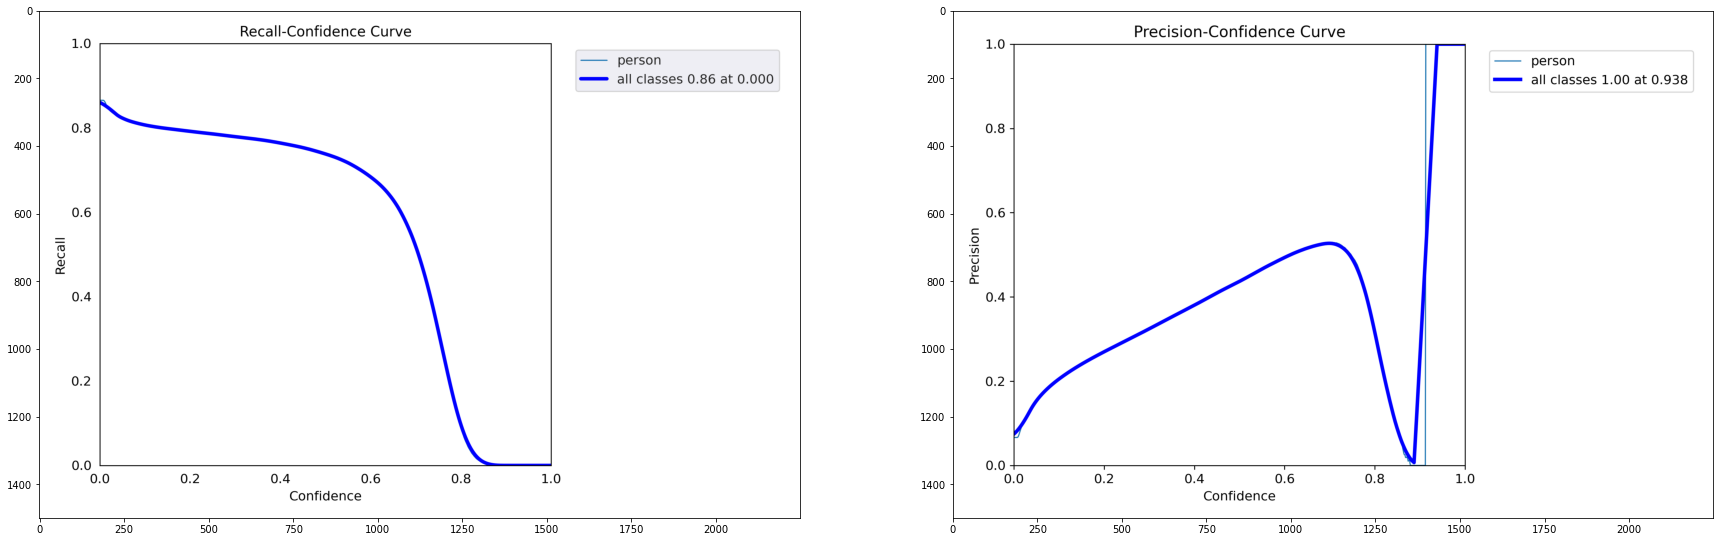

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2,  figsize=(30, 30))
img = mpimg.imread("runs/val/exp11/R_curve.png")
ax1.imshow(img)
img = mpimg.imread("runs/val/exp11/P_curve.png")
ax2.imshow(img)

Let's check if it makes sense to tweak NMS-IOU.

In [ ]:
!bash hypersearch_ious_pretrained_models.sh

File: /content/gdrive/MyDrive/PlayerTracking/tracker/yolov5/utils/general.py
ROOT: /content/gdrive/MyDrive/PlayerTracking/tracker/yolov5
val: data=../data.yaml, weights=['yolov5s.pt'], batch_size=32, imgsz=3260, conf_thres=0.001, iou_thres=0.34, task=val, device=, workers=8, single_cls=True, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 2022-10-22 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
val: Scanning '/content/gdrive/MyDrive/PlayerTracking/tracker/yolov5/../valid/labels.cache' images and labels... 1068 found, 0 missing, 0 empty, 0 corrupt: 100% 1068/1068 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100% 34/34 [01:17<00:00,  2.28s/it]
                   all       1068      24564      0.495      0.681 

Let's first summarize results so it is easier to see what is happening

In [ ]:
nms = pd.DataFrame(data={"precision": [0.495, 0.495, 0.495, 0.246], "recall": [0.681, 0.681, 0.675, 0.542], 
                    "mAP@.5": [0.413, 0.421, 0.425, 0.211], "mAP@.5::.95": [0.123, 0.126, 0.131, 0.0722]}, index=["NMS=0.34", "NMS=0.6", "NMS=0.8", "NMS=0.95"])
nms

,precision,recall,mAP@.5,mAP@.5::.95
NMS=0.34,0.495,0.681,0.413,0.1230
NMS=0.6,0.495,0.681,0.421,0.1260
NMS=0.8,0.495,0.675,0.425,0.1310
NMS=0.95,0.246,0.542,0.211,0.0722


As expected, when having large IOU, we are requiring our model to be very precise which means that we won't detect all objects. We will continue with the default value of 0.6. 

There are 10 different available pretrained YOLOv5 models that differ by their size and the inference time they provide. The smallest of them is of size 14MB while the largest is almost 12x larger and takes 168MB.
In this section, we will check how 9 of them perform and compare the results. The assumption is that larger models will work better.

In [ ]:
!bash pretrained_models_val.sh

File: /content/gdrive/MyDrive/PlayerTracking/tracker/yolov5/utils/general.py
ROOT: /content/gdrive/MyDrive/PlayerTracking/tracker/yolov5
val: data=../data.yaml, weights=['yolov5s.pt'], batch_size=32, imgsz=3260, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=True, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 2022-10-22 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
val: Scanning '/content/gdrive/MyDrive/PlayerTracking/tracker/yolov5/../valid/labels.cache' images and labels... 1068 found, 0 missing, 0 empty, 0 corrupt: 100% 1068/1068 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100% 34/34 [01:18<00:00,  2.30s/it]
                   all       1068      24564      0.495      0.681  

We will again summarize our results in the table.

In [ ]:
pretrained_models_results = pd.DataFrame(data={"precision": [0.495, 0.393, 0.407, 0.384, 0.412, 0.313, 0.357, 0.369, 0.384],
                                               "recall": [0.681, 0.604, 0.657, 0.677, 0.659, 0.545, 0.659, 0.641, 0.678],
                                               "mAP@.5": [0.421, 0.319, 0.341, 0.321, 0.338, 0.249, 0.292, 0.316, 0.335],
                                               "mAP@.5:.95": [0.126, 0.095, 0.0949, 0.0897, 0.0942, 0.0738, 0.0818, 0.0858, 0.0983]},
                                         index=["yolov5s.pt", "yolov5n.pt", "yolov5m.pt", "yolov5l.pt", "yolov5s6.pt", "yolov5n6.pt", "yolov5m6.pt",
                                                "yolov5l6.pt", "yolov5x6.pt"])
pretrained_models_results

,precision,recall,mAP@.5,mAP@.5:.95
yolov5s.pt,0.495,0.681,0.421,0.1260
yolov5n.pt,0.393,0.604,0.319,0.0950
yolov5m.pt,0.407,0.657,0.341,0.0949
yolov5l.pt,0.384,0.677,0.321,0.0897
yolov5s6.pt,0.412,0.659,0.338,0.0942
yolov5n6.pt,0.313,0.545,0.249,0.0738
yolov5m6.pt,0.357,0.659,0.292,0.0818
yolov5l6.pt,0.369,0.641,0.316,0.0858
yolov5x6.pt,0.384,0.678,0.335,0.0983


Let's plot results so it easier to make some conclusions.

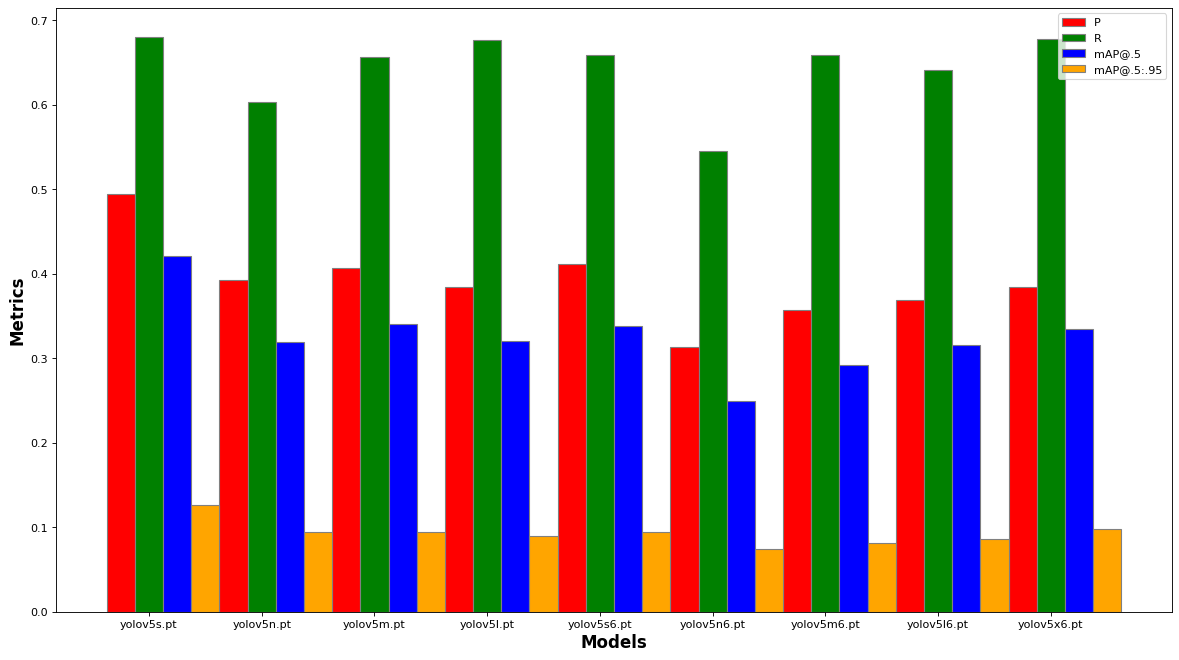

In [ ]:
bar_width = 0.25
# Set position of bar on X axis
br1 = np.arange(pretrained_models_results.shape[0])
br2 = [x + bar_width for x in br1]
br3 = [x + bar_width for x in br2]
br4 = [x + bar_width for x in br3]

plt.figure(figsize=(18, 10), dpi=80)

# Make the plot
plt.bar(br1, pretrained_models_results["precision"], color ='r', width = bar_width,
        edgecolor ='grey', label ='P')
plt.bar(br2, pretrained_models_results["recall"], color ='g', width = bar_width,
        edgecolor ='grey', label ='R')
plt.bar(br3, pretrained_models_results["mAP@.5"], color ='b', width = bar_width,
        edgecolor ='grey', label ='mAP@.5')
plt.bar(br4, pretrained_models_results["mAP@.5:.95"], color ='orange', width = bar_width,
        edgecolor ='grey', label ='mAP@.5:.95')
 
# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Metrics', fontweight ='bold', fontsize = 15)
plt.xticks([r + bar_width for r in range(pretrained_models_results.shape[0])], pretrained_models_results.index.tolist())
 
plt.legend()
plt.show()


All models perform quite the same, but interestingly we can see that the fastest model(also the second smallest) performs a little bit better than others. However, we are not very happy with the performance so we will fine tune the model. We expect this to have positive effect because of the image size and size of the detections.

In [ ]:
# Do this on some very small dataset at the end because currently everything falls apart
%pip install -q clearml && clearml-init
# at the end, reinstall clear-ml package

ERROR: Operation cancelled by user


We will choose second smallest model, yolov5s and fine tune it on our custom dataset. Then we will evaluate object detector and compare the results.

In [ ]:
# cd /content/gdrive/MyDrive/PlayerTracking/tracker/yolov5
# curl -L "https://app.roboflow.com/ds/dU1WfnOhXc?key=vwTl7TFy25" > roboflow_rescaled.zip; unzip roboflow_rescaled.zip; rm roboflow_rescaled.zip

In [ ]:
!pip install roboflow

In [ ]:
# This can be used only for predicting separate images
%cd /content/gdrive/MyDrive/PlayerTracking/tracker/yolov5
from roboflow import Roboflow
rf = Roboflow(api_key="BJKR44YjG96UkbI3cGUR")
project = rf.workspace().project("player_tracking_t7_labeled")
model = project.version(2).model
model.predict("../../data/rsz_frame7501.jpg", confidence=40, overlap=30).save("prediction.jpg")

/content/gdrive/MyDrive/PlayerTracking/tracker/yolov5
loading Roboflow workspace...
loading Roboflow project...


Let's compare obtained results after training on a machine with 12GB GPU vs. only pre-trained model.

In [ ]:
# Let's compare results of the fine-tuned model to the original pre-trained model
comparison_results = pd.DataFrame(
    data={"precision": [0.393, 0.978], "recall": [0.604, 0.975], "mAP@.5": [0.319, 0.987], "mAP@.5:.95": [0.0950, 0.659]},
    index=['yolov5n.pt', 'fine-tuned']
)
comparison_results

,precision,recall,mAP@.5,mAP@.5:.95
yolov5n.pt,0.393,0.604,0.319,0.095
fine-tuned,0.978,0.975,0.987,0.659


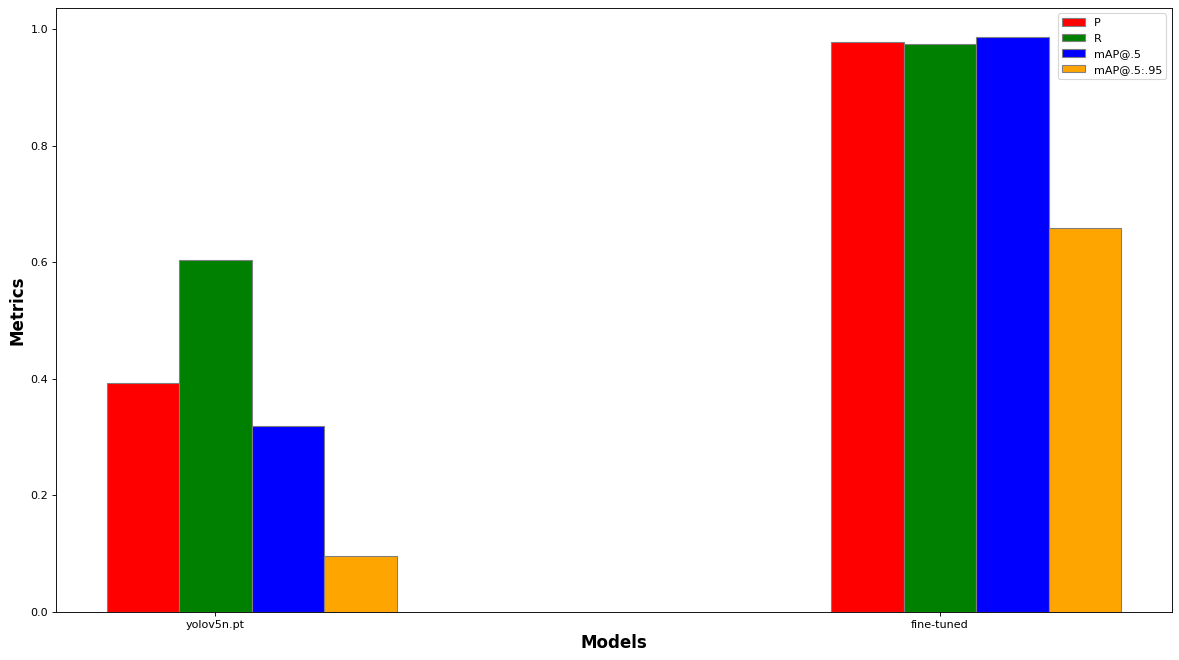

In [ ]:
bar_width = 0.1
# Set position of bar on X axis
br1 = np.arange(comparison_results.shape[0])
br2 = [x + bar_width for x in br1]
br3 = [x + bar_width for x in br2]
br4 = [x + bar_width for x in br3]

plt.figure(figsize=(18, 10), dpi=80)

# Make the plot
plt.bar(br1, comparison_results["precision"], color ='r', width = bar_width,
        edgecolor ='grey', label ='P')
plt.bar(br2, comparison_results["recall"], color ='g', width = bar_width,
        edgecolor ='grey', label ='R')
plt.bar(br3, comparison_results["mAP@.5"], color ='b', width = bar_width,
        edgecolor ='grey', label ='mAP@.5')
plt.bar(br4, comparison_results["mAP@.5:.95"], color ='orange', width = bar_width,
        edgecolor ='grey', label ='mAP@.5:.95')
 
# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Metrics', fontweight ='bold', fontsize = 15)
plt.xticks([r + bar_width for r in range(comparison_results.shape[0])], comparison_results.index.tolist())
 
plt.legend()
plt.show()